Uploading the dataset from laptop to colab

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

uploaded = files.upload()
df = pd.read_csv('day.csv')

uploaded = files.upload()
data=pd.read_csv('hour.csv')

df.head()
data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


We normalise the values of count column (cnt)

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[['cnt']])
df[['cnt']]=scaler.transform(df[['cnt']])
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,0.110792
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,0.089623
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,0.152669
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,0.177174
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,0.181546


Text(0, 0.5, 'Count')

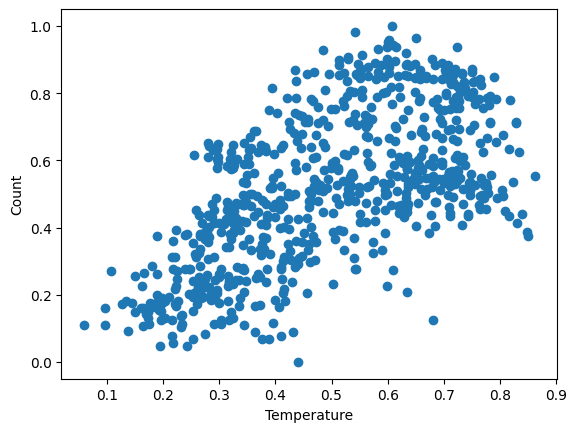

In [ ]:
plt.scatter(df.temp, df.cnt)
plt.xlabel('Temperature')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

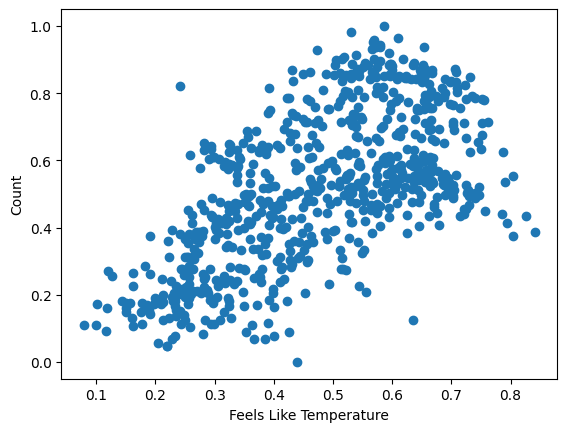

In [ ]:
plt.scatter(df.atemp, df.cnt)
plt.xlabel('Feels Like Temperature')
plt.ylabel('Count')


Since plot of temp vs cnt and atemp vs cnt is similar, we use only temp vs cnt


Text(0, 0.5, 'Count')

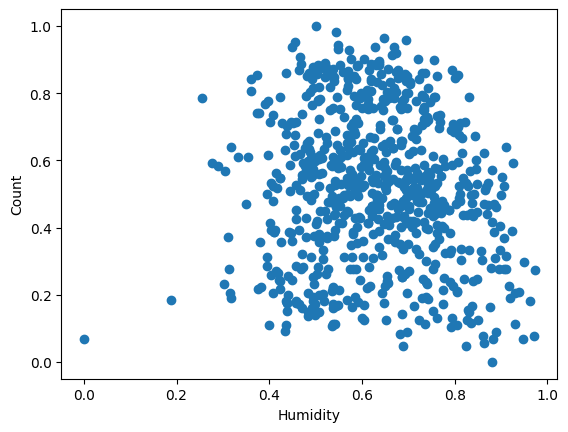

In [ ]:
plt.scatter(df.hum, df.cnt)
plt.xlabel('Humidity')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

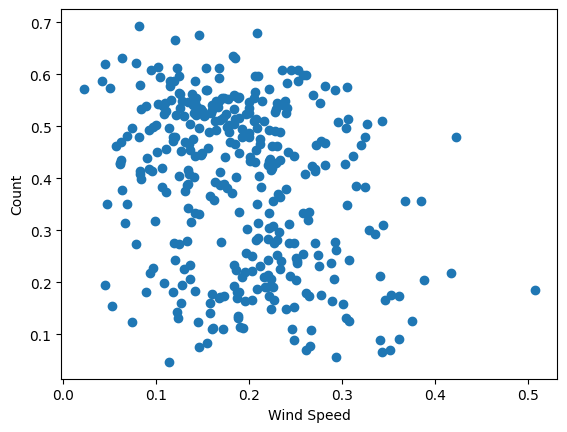

In [ ]:
df_year0 = df[df['yr'] == 0]
plt.scatter(df_year0['windspeed'], df_year0['cnt'])
plt.xlabel('Wind Speed')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

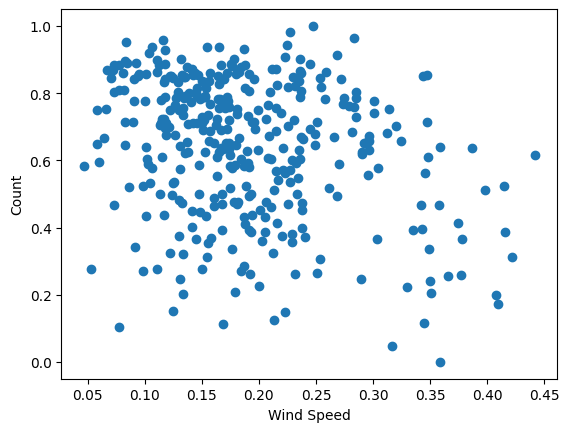

In [ ]:
df_year0 = df[df['yr'] == 1]
plt.scatter(df_year0['windspeed'], df_year0['cnt'])
plt.xlabel('Wind Speed')
plt.ylabel('Count')

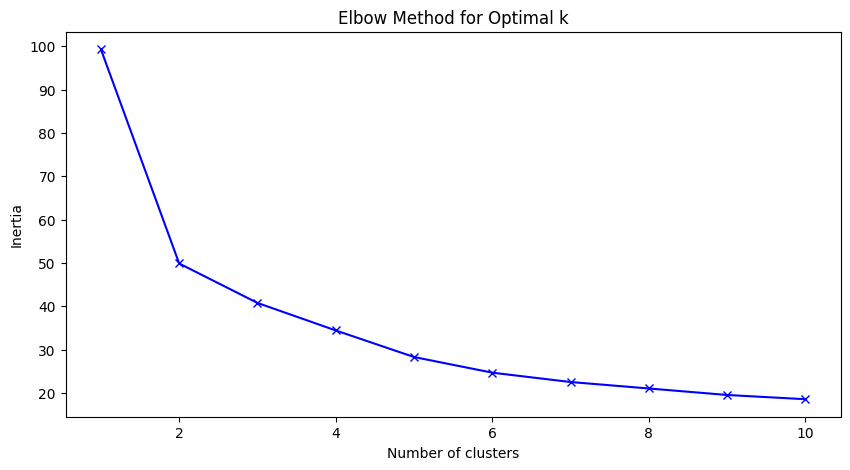

In [ ]:
features = df[['temp', 'atemp', 'hum', 'windspeed','cnt']]
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Seeing the above p.ot, we take no. of clusters= 2


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

        cnt  cluster_label  
0  0.110792              1  
1  0.089623              1  

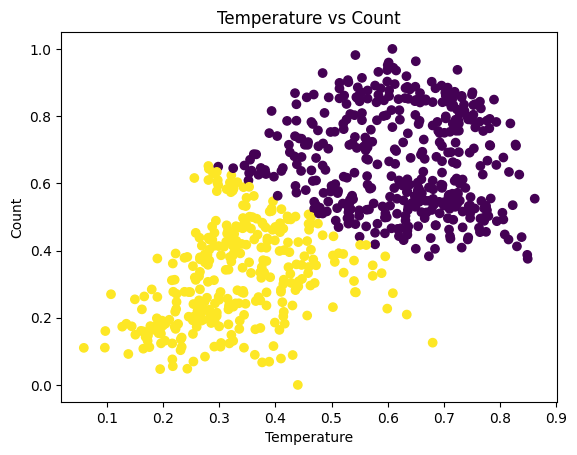

In [ ]:

# Extract relevant features for clustering
features = df[['temp', 'cnt']].values

def initialize_random_centroids(data_points, num_clusters):
    """Select random data points as initial centroids."""
    np.random.seed(42)
    random_indices = np.random.choice(data_points.shape[0], num_clusters, replace=False)
    centroids = data_points[random_indices]
    return centroids

def assign_clusters_to_points(data_points, centroids):
    """Assign each data point to the closest centroid."""
    distance_to_centroids = np.sqrt(((data_points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distance_to_centroids, axis=0)

def update_centroids_based_on_labels(data_points, labels, num_clusters):
    """Compute new centroids as the average of assigned points."""
    new_centroids = np.array([data_points[labels == i].mean(axis=0) for i in range(num_clusters)])
    return new_centroids

def perform_kmeans_clustering(data_points, num_clusters, max_iters=100, convergence_threshold=1e-4):
    """Execute the k-means clustering algorithm."""
    centroids = initialize_random_centroids(data_points, num_clusters)
    for _ in range(max_iters):
        labels = assign_clusters_to_points(data_points, centroids)
        updated_centroids = update_centroids_based_on_labels(data_points, labels, num_clusters)
        if np.all(np.abs(updated_centroids - centroids) < convergence_threshold):
            break
        centroids = updated_centroids
    return centroids, labels

# Set the desired number of clusters
cluster_count = 2

# Run the k-means clustering algorithm
final_centroids, assigned_labels = perform_kmeans_clustering(features, cluster_count)

# Add the cluster labels to the original dataframe
df['cluster_label'] = assigned_labels

# Display the first few entries of the updated dataframe
print(df.head())

# Visualize the clustered data
plt.scatter(df['temp'], df['cnt'], c=df['cluster_label'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs Count')
plt.show()





   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

        cnt  cluster_label  cluster_hum  
0  0.110792              1            1  
1 

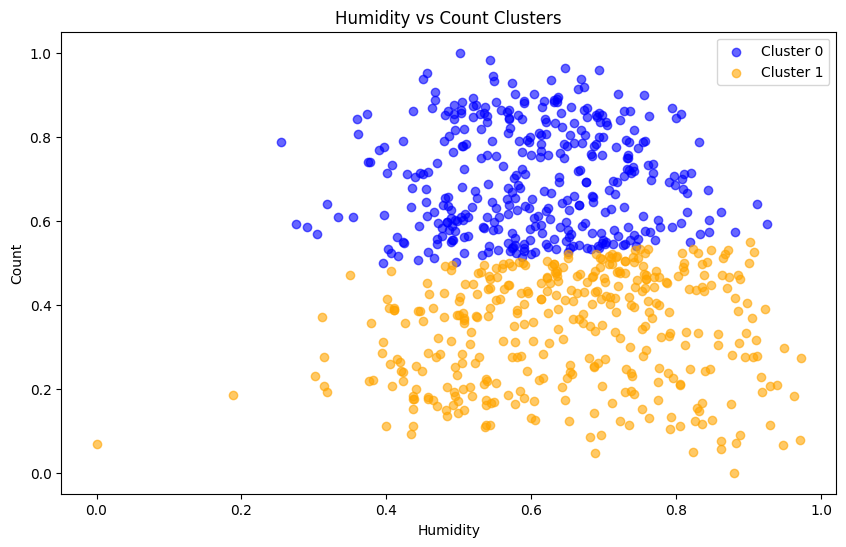

In [ ]:

# Select features for clustering
humidity_count = df[['hum', 'cnt']].values

# Set the desired number of clusters
num_clusters = 2

# Run the k-means clustering algorithm
final_centroids, y_predicted_hum = perform_kmeans_clustering(humidity_count, num_clusters)

# Add the cluster labels to the original dataframe
df['cluster_hum'] = y_predicted_hum

# Display the first few entries of the updated dataframe
print(df.head())

# Create separate dataframes for each cluster
df_hum0 = df[df.cluster_hum == 0]
df_hum1 = df[df.cluster_hum == 1]

# Plot the clustered data with x-axis as humidity and y-axis as count
plt.figure(figsize=(10, 6))
plt.scatter(df_hum0['hum'], df_hum0['cnt'], label='Cluster 0', color='blue', alpha=0.6)
plt.scatter(df_hum1['hum'], df_hum1['cnt'], label='Cluster 1', color='orange', alpha=0.6)

plt.xlabel('Humidity')  # Set x-axis to Humidity
plt.ylabel('Count')     # Set y-axis to Count
plt.title('Humidity vs Count Clusters')
plt.legend()
plt.show()


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

        cnt  cluster_label  cluster_hum  cluster_wind  
0  0.110792              1    

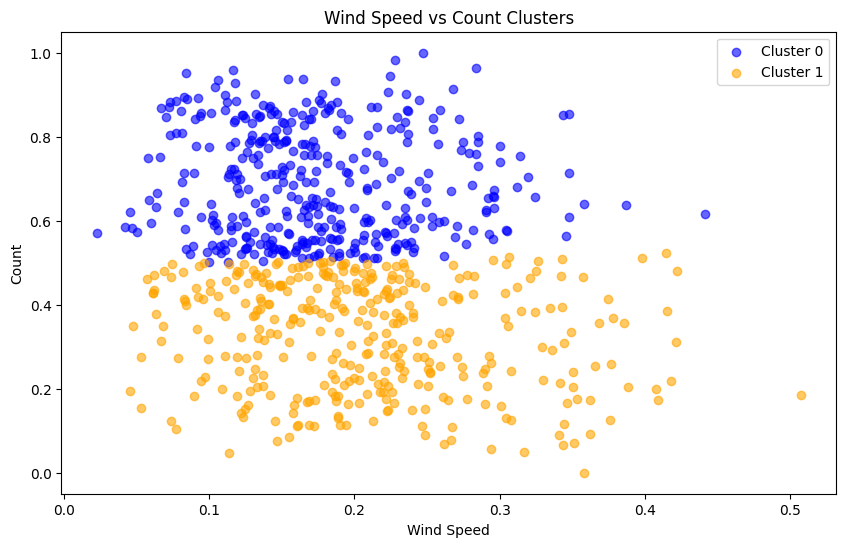

In [ ]:
# Select features for clustering
windspeed_count = df[['windspeed', 'cnt']].values

# Set the desired number of clusters
num_clusters = 2

# Run the k-means clustering algorithm
final_centroids, y_predicted_wind = perform_kmeans_clustering(windspeed_count, num_clusters)

# Add the cluster labels to the original dataframe
df['cluster_wind'] = y_predicted_wind

# Display the first few entries of the updated dataframe
print(df.head())

# Create separate dataframes for each cluster
df_wind0 = df[df.cluster_wind == 0]
df_wind1 = df[df.cluster_wind == 1]

# Plot the clustered data with x-axis as wind speed and y-axis as count
plt.figure(figsize=(10, 6))
plt.scatter(df_wind0['windspeed'], df_wind0['cnt'], label='Cluster 0', color='blue', alpha=0.6)
plt.scatter(df_wind1['windspeed'], df_wind1['cnt'], label='Cluster 1', color='orange', alpha=0.6)

plt.xlabel('Wind Speed')  # Set x-axis to Wind Speed
plt.ylabel('Count')       # Set y-axis to Count
plt.title('Wind Speed vs Count Clusters')
plt.legend()
plt.show()

In [ ]:
dt = pd.read_csv('hour.csv')

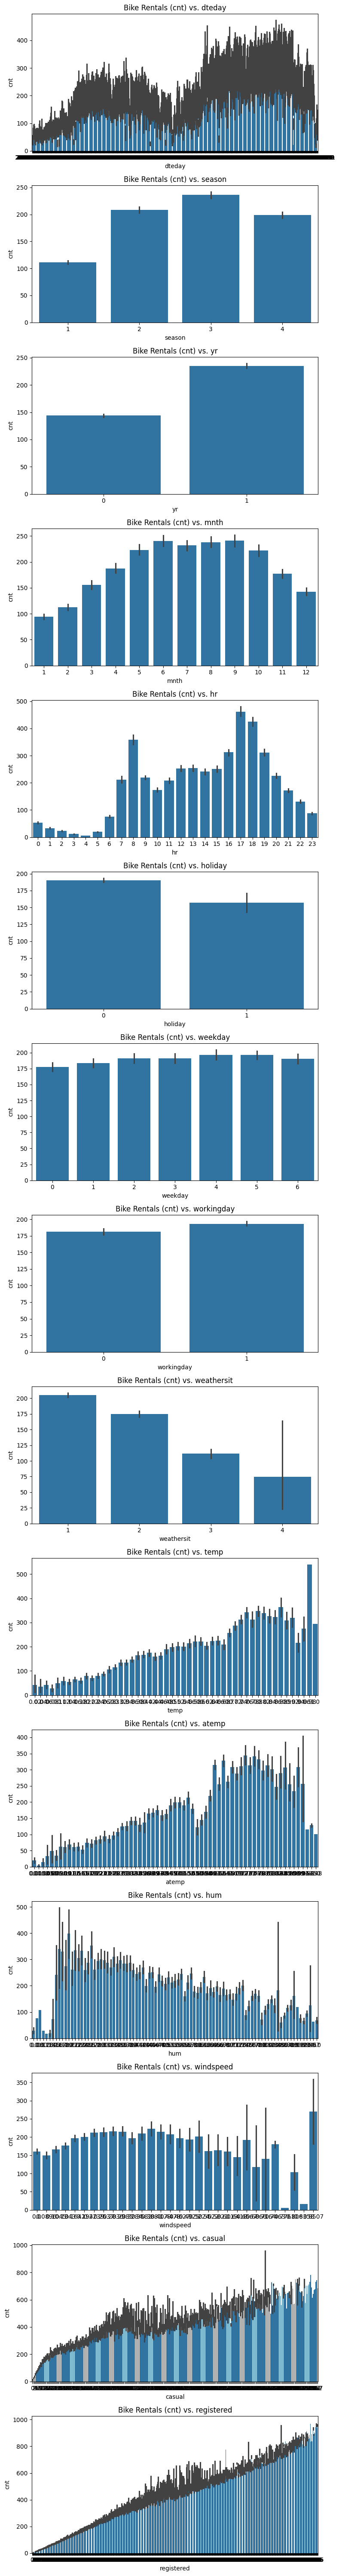

In [ ]:
features_to_plot = [col for col in dt.columns if col not in ['instant', 'cnt']]


fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(8, 4 * len(features_to_plot)))

for i, feature in enumerate(features_to_plot):
  sns.barplot(x=feature, y='cnt', data=dt, ax=axes[i])
  axes[i].set_title(f'Bike Rentals (cnt) vs. {feature}')


plt.tight_layout()
plt.show()

ROUGH WORK ( इसके नीचे का IGNORE करदे )



Text(0, 0.5, 'Count')

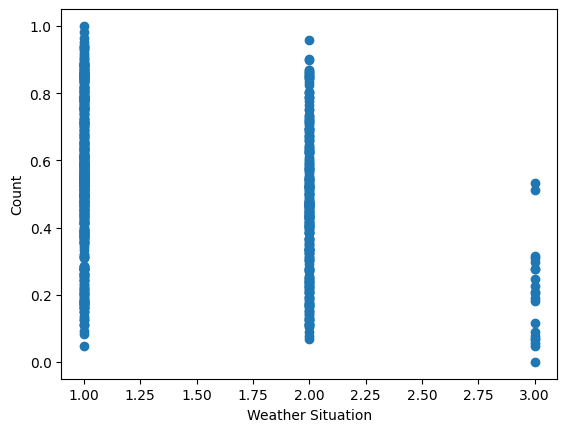

In [ ]:

plt.scatter(df.weathersit, df.cnt)
plt.xlabel('Weather Situation')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

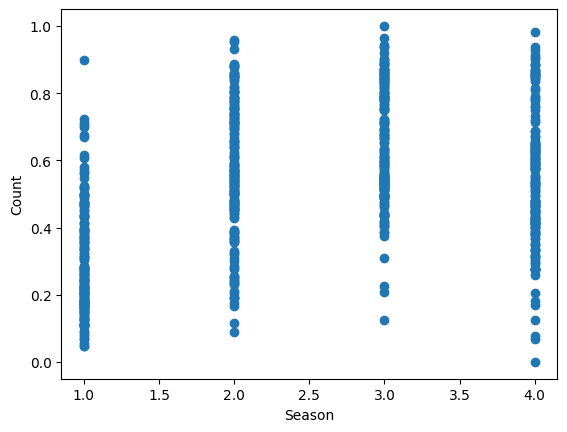

In [ ]:
plt.scatter(df.season, df.cnt)
plt.xlabel('Season')
plt.ylabel('Count')